In [2]:
%pylab inline
import numpy as np
import sklearn.linear_model as linear
import sklearn.model_selection as selection
import sklearn.metrics as metrics

Populating the interactive namespace from numpy and matplotlib


# Basis Transformations

Recall the definition of a basis transform mentioned in the slides. Suppose that our initial feature vectors are elements of $\mathbb{R}^{m}$, and that our initial problem is a non-linear problem. Suppose that we have $p$ basis transformations that allow us to project feature vectors in $\mathbb{R}^{m}$ to a new representation in $\mathbb{R}^{p}$ such that the problem is now linearly solvable.

Let us consider the case of fitting a function that is best modelled by a polynomial of degree 3. Our dataset - polynomial_data.npy - contains pairs of (x, y) values. First let us observe what happens when we attempt to model the problem as a linear problem and use linear regression. After we shall then see how the basis transform $\phi_{k}(x) = x^{k}$ for $k = \{1, 2, 3\}$ allows us to solve the problem using linear regression

In [51]:
data = []
with open('polynomial_data.npy', 'rb') as fp:
    data = np.load(fp)

In [52]:
X = data[:,0].reshape(-1, 1)
y = data[:,1].reshape(-1, 1)

In [53]:
kf = selection.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

5

In [54]:
mse = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = linear.LinearRegression()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    error = metrics.mean_squared_error(y_test, predictions)
    mse.append(error)
print('Average mse is ', np.mean(mse))

Average mse is  126754.31748061368


As a bit of visual demonstration, let's plot the actual data against what the model predicted

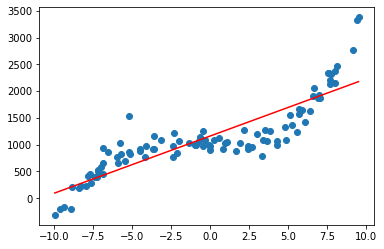

In [55]:
plt.scatter(X, y)
xs = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)
ys = lr.predict(xs)
plt.plot(xs, ys, '-r')

This model performance, as seen both numerically and visually, is terrible. Let us know apply a basis transform
to re-represent our feature vector into one that can solve the problem linearly

In [56]:
def basis_transform(X):
    phi_1 = X
    phi_2 = X ** 2
    phi_3 = X ** 3
    X_new = np.concatenate(tuple([phi_1, phi_2, phi_3]), axis=1)
    return X_new

In [57]:
kf = selection.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)
mse_original = []
mse_basis = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr = linear.LinearRegression()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    error = metrics.mean_squared_error(y_test, predictions)
    mse_original.append(error)
    
    lr2 = linear.LinearRegression()
    X_train = basis_transform(X_train)
    X_test = basis_transform(X_test)
    lr2.fit(X_train, y_train)
    predictions = lr2.predict(X_test)
    error = metrics.mean_squared_error(y_test, predictions)
    mse_basis.append(error)
    
print('Average mse for original is ', np.mean(mse_original))
print('Average mse for basis transformed  is ', np.mean(mse_basis))

Average mse for original is  126152.80646719402
Average mse for basis transformed  is  23403.338371849248


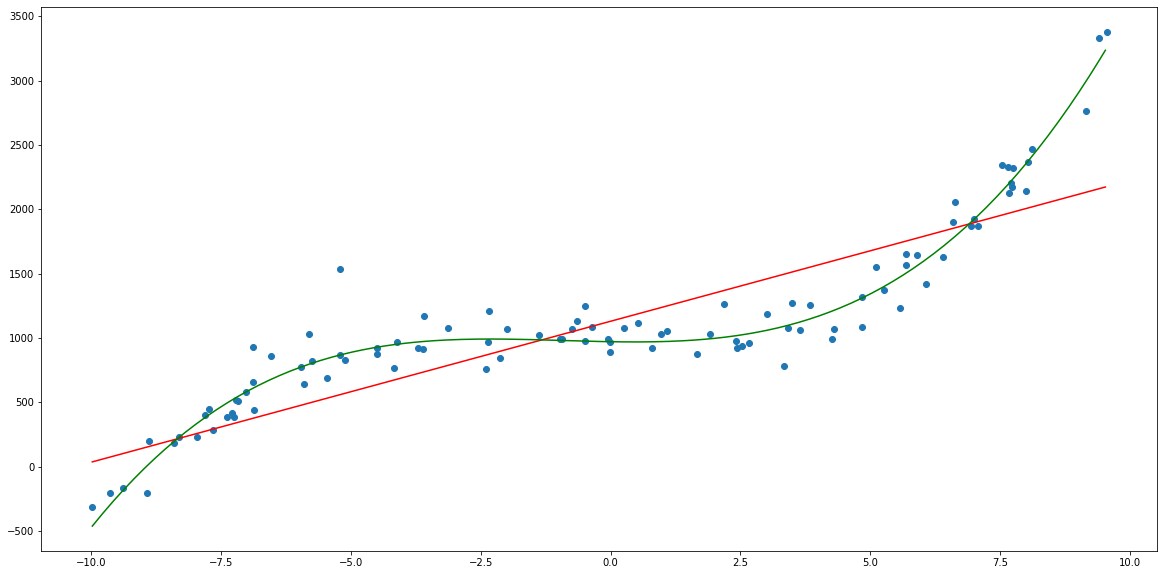

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)

# plot original
xs = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)
ys = lr.predict(xs)
plt.plot(xs, ys, '-r')

xs = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)
transformed = basis_transform(xs)
ys = lr2.predict(transformed)
plt.plot(xs, ys, '-g')

# plot basis transformation



Here, we see that the yellow line better captures the problem